<a href="https://colab.research.google.com/github/Balara00/ML_Lab01/blob/main/label_2/ML_Lab01_label_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

Importing dataset

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML_Lab 1"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [8]:
train[LABELS + [FEATURES[i] for i in range(0, 256, 32)]].describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 260 entries, feature_1 to label_4
dtypes: float64(257), int64(3)
memory usage: 56.6 MB


Scaling dataset

In [9]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  train_ds = train[train['label_2'].notna()] if target_label == 'label_2' else train
  valid_ds = valid[valid['label_2'].notna()] if target_label == 'label_2' else valid
  test_ds = test
  # test_ds = test[test['label_2'].notna()] if target_label == 'label_2' else test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(train_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = train_ds[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(valid_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = valid_ds[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_ds[target_label]

In [10]:
y_train['label_2']

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

In [11]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train[L2], y_train[L2])

KNeighborsRegressor(n_neighbors=3)

In [12]:
from sklearn import metrics

y_pred = regressor.predict(x_valid[L2])
y_pred_test_before = regressor.predict(x_test[L2])

In [13]:
print('Predicted labels before feature engineering:', y_pred_test_before)

Predicted labels before feature engineering: [26.         29.         28.         27.         31.         25.
 25.         25.         25.         25.         25.         25.
 25.         25.         25.         25.         25.         25.
 27.         27.         27.         27.         27.         27.
 27.         26.33333333 23.         23.         23.         23.
 23.         23.         23.         23.         23.         23.
 23.         23.         25.         23.         23.         23.
 33.         33.         33.         33.         33.         33.
 33.         33.         33.         33.         33.         33.
 34.         34.         34.         34.         34.         34.
 34.         34.         34.         34.         34.         22.
 22.         22.         22.         22.         22.         22.
 22.         22.         22.         30.         30.         30.
 30.         30.         30.         30.         30.         30.
 30.         30.         30.         30.     

In [14]:
print("Validation Set Performance:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred))

# print (metrics.confusion_matrix(y_valid[L2], y_pred))
# print (metrics.accuracy_score(y_valid[L2], y_pred))
# print (metrics.precision_score(y_valid[L2], y_pred, average="weighted"))
# print (metrics.recall_score(y_valid[L2], y_pred, average="weighted"))

Validation Set Performance:
Mean Absolute Error: 0.07744565217391304
Mean Squared Error: 0.3715277777777778
R-squared: 0.991244390032218


# Feature Engineering

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=100)
x_train_new = selector.fit_transform(x_train[L2], y_train[L2])
x_valid_new = selector.transform(x_valid[L2])
print("Shape: ", x_train_new.shape)

Shape:  (28040, 100)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train_new, y_train[L2])

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Make predictions on the validation set
y_pred = regressor.predict(x_valid_new)

# Evaluate the KNN regressor's performance
print("Validation Set Performance:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred))

Validation Set Performance:
Mean Absolute Error: 0.1394927536231884
Mean Squared Error: 1.2542270531400965
R-squared: 0.970442256151023


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L2])
x_train_trf = pd.DataFrame(pca.transform(x_train[L2]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L2]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28040, 67)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train_trf, y_train[L2])

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Make predictions on the validation set
y_pred = regressor.predict(x_valid_trf)

# Evaluate the KNN regressor's performance
print("Validation Set Performance:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred))

Validation Set Performance:
Mean Absolute Error: 0.11186594202898552
Mean Squared Error: 0.5605374396135266
R-squared: 0.9867900935349961


### PCA with SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Step 1: Feature selection with SelectKBest
selector = SelectKBest(f_classif, k=150)
x_train_new = selector.fit_transform(x_train[L2], y_train[L2])

# Step 2: Apply PCA to the selected features
pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_new)

print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28040, 57)


In [16]:
# Create a validation set with the same feature transformations
x_valid_new = selector.transform(x_valid[L2])
x_valid_pca = pca.transform(x_valid_new)

In [17]:
x_test_new = selector.transform(x_test[L2])
x_test_pca = pca.transform(x_test_new)

In [18]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train_pca, y_train[L2])

KNeighborsRegressor(n_neighbors=3)

In [19]:
# Make predictions on the validation set
y_pred = regressor.predict(x_valid_pca)

# Evaluate the KNN regressor's performance
print("Validation Set Performance:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred))

Validation Set Performance:
Mean Absolute Error: 0.17481884057971017
Mean Squared Error: 1.0525362318840579
R-squared: 0.9751954032119562


In [20]:
# Make predictions on the test set
y_pred_test_after = regressor.predict(x_test_pca)
print('Predicted values before feature engineering:', y_pred_test_after)

Predicted values before feature engineering: [26.         31.         27.66666667 26.         27.66666667 28.
 25.         25.         25.         25.         25.         25.
 25.         25.         25.         25.         25.         25.
 27.         27.         27.         27.         27.         27.
 27.         25.33333333 23.         23.         23.         23.
 23.         26.33333333 23.         23.         23.         23.
 23.         23.         25.         23.         23.         23.
 33.         33.         33.         33.         33.         33.
 33.         33.         33.         33.         33.         33.
 34.         30.         34.         34.         34.         34.
 34.         34.         34.         34.         34.         22.
 22.         22.         22.         22.         22.         22.
 22.         22.         22.         30.         30.         30.
 30.         30.         30.         30.         30.         30.
 30.         30.         30.         30.     

**Output**

In [21]:
# output_df = pd.DataFrame({
#     'Predicted labels before feature engineering': y_pred_test_before,
#     'Predicted labels after feature engineering': y_pred_test_after,
#     'No. of new features': x_test_pca.shape[1]
# })


# for i in range(257):  # Looping from 0 to 256 inclusive
#     column_name = f'new_feature_{i+1}'  # Construct the column name

#     # Check if the feature exists in x_test_pca
#     if i < x_test_pca.shape[1]:
#         output_df[column_name] = x_test_pca[:, i]  # Fill with the feature data
#     else:
#         output_df[column_name] = None  # Fill with blank or NaN values


# output_df.head()

# Create the base DataFrame
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No of new features': [x_test_pca.shape[1]] * len(y_pred_test_before)
})

# List to store all the new feature Series
new_features = []

# Extract new features from x_test_pca
for i in range(min(256, x_test_pca.shape[1])):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series(x_test_pca[:, i], name=column_name))

# If there are any remaining columns to reach 256, fill them with NaN
for i in range(x_test_pca.shape[1], 256):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series([None] * len(output_df), name=column_name))

# Concatenate all the new feature columns to output_df
output_df = pd.concat([output_df] + new_features, axis=1)

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,26.0,26.000000,57,4.137631,-1.798258,-1.045278,2.281650,1.848408,3.794337,5.467832,...,None,None,None,None,None,None,None,None,None,None
1,29.0,31.000000,57,8.222044,-6.238395,-3.447148,6.260386,1.519883,3.600293,2.164660,...,None,None,None,None,None,None,None,None,None,None
2,28.0,27.666667,57,3.776992,-3.606769,-0.901646,4.795798,-1.462135,1.539941,2.405773,...,None,None,None,None,None,None,None,None,None,None
3,27.0,26.000000,57,5.047628,-1.583571,0.852264,0.156158,2.942516,-1.079332,0.581642,...,None,None,None,None,None,None,None,None,None,None
4,31.0,27.666667,57,4.331935,0.366790,-3.375886,2.286597,0.665909,1.059298,3.137431,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190572L_label_2_final.csv", index=False)

**Co-relation Matrix**

In [ ]:
# Convert the PCA-transformed features (x_train_pca) to a Pandas DataFrame
x_train_pca_df = pd.DataFrame(x_train_pca)

# Calculate the correlation matrix
corr_matrix = x_train_pca_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.000000e+00,-4.148338e-16,1.837048e-17,-3.464598e-16,6.148804e-16,-2.198440e-16,-1.085452e-16,-5.419437e-16,-1.823628e-16,-2.968560e-17,...,-3.364636e-17,-5.196407e-16,-9.720159e-17,-9.809939e-17,6.531744e-17,-3.585438e-17,-5.487844e-17,-4.032574e-17,-1.892498e-16,2.531512e-18
1,-4.148338e-16,1.000000e+00,-3.409107e-17,-6.311297e-16,4.938542e-16,2.488082e-17,-7.105034e-17,-1.427576e-16,1.531719e-17,1.805486e-16,...,1.486817e-16,-5.835081e-17,-4.312631e-16,-3.373842e-16,8.181898e-17,-1.841553e-16,9.686082e-17,4.543323e-17,-1.141667e-17,-2.596646e-16
2,1.837048e-17,-3.409107e-17,1.000000e+00,4.989876e-16,-1.938087e-16,1.865020e-16,-3.326399e-17,-2.961333e-16,-1.142673e-16,-3.225476e-16,...,8.696477e-17,-2.809962e-17,-1.442934e-16,-5.818136e-17,1.154443e-16,-8.254112e-17,-9.657213e-17,-1.088838e-16,-2.605628e-16,-3.761266e-17
3,-3.464598e-16,-6.311297e-16,4.989876e-16,1.000000e+00,5.664187e-16,2.227219e-16,1.298616e-18,-3.471298e-16,-2.225685e-16,-2.712916e-16,...,-3.625168e-17,-2.665733e-17,1.511842e-16,1.246678e-16,2.800843e-16,3.075962e-16,-6.270953e-17,-6.730339e-17,-2.978604e-16,-1.963233e-16
4,6.148804e-16,4.938542e-16,-1.938087e-16,5.664187e-16,1.000000e+00,1.944831e-16,-1.916165e-16,1.542260e-16,-2.484782e-16,3.851832e-16,...,2.965072e-16,2.057219e-16,-1.039233e-16,1.305484e-16,5.695466e-17,-1.141978e-18,4.558248e-17,-1.230561e-16,-1.683762e-16,2.671816e-17
5,-2.198440e-16,2.488082e-17,1.865020e-16,2.227219e-16,1.944831e-16,1.000000e+00,-2.469324e-16,-1.230690e-16,-2.572397e-16,1.127603e-16,...,1.830096e-16,-4.278007e-17,1.848150e-16,-3.918233e-17,9.717999e-18,1.815201e-16,-2.726150e-17,1.507237e-16,1.246752e-16,2.124192e-16
6,-1.085452e-16,-7.105034e-17,-3.326399e-17,1.298616e-18,-1.916165e-16,-2.469324e-16,1.000000e+00,3.121983e-16,-3.065561e-16,-3.466122e-16,...,-1.937861e-16,1.297196e-16,-2.548672e-17,2.860220e-17,-7.506451e-17,-2.140226e-16,1.738185e-16,2.860603e-16,-2.050510e-16,-5.250115e-17
7,-5.419437e-16,-1.427576e-16,-2.961333e-16,-3.471298e-16,1.542260e-16,-1.230690e-16,3.121983e-16,1.000000e+00,-2.404555e-16,-3.730404e-16,...,-9.477694e-17,6.323143e-17,2.767789e-16,-1.960363e-17,7.815182e-17,-5.563743e-17,2.839105e-17,-1.185296e-16,-2.173995e-16,-1.171708e-16
8,-1.823628e-16,1.531719e-17,-1.142673e-16,-2.225685e-16,-2.484782e-16,-2.572397e-16,-3.065561e-16,-2.404555e-16,1.000000e+00,9.541786e-17,...,-2.089440e-17,1.773016e-16,2.164832e-16,2.378664e-17,-1.499782e-17,-1.042643e-16,6.916651e-17,2.488814e-16,-3.505456e-17,2.303415e-17
9,-2.968560e-17,1.805486e-16,-3.225476e-16,-2.712916e-16,3.851832e-16,1.127603e-16,-3.466122e-16,-3.730404e-16,9.541786e-17,1.000000e+00,...,5.959306e-17,-1.559666e-16,-1.625324e-16,1.768071e-16,6.941513e-17,-1.354397e-17,-7.046673e-17,5.062937e-17,1.383243e-16,-8.328572e-17


<Axes: >

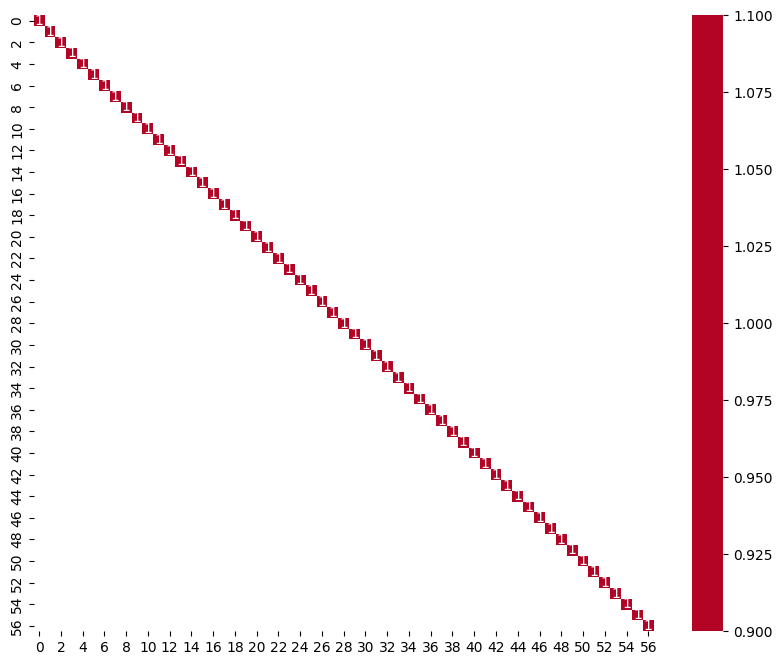

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)